# Visualization

## Library and Setup

In [86]:
library(ggplot2)
library(dplyr)
library(gridExtra)

In [87]:
## jupyter set plot size
options(repr.plot.width =8 , repr.plot.height = 3.5, repr.plot.res = 150)

## Sample Data

In [88]:
str( mtcars )

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


## Line Types, Shape and Colors

### Recommended Color (col)

Subsequent examples will use this color scheme

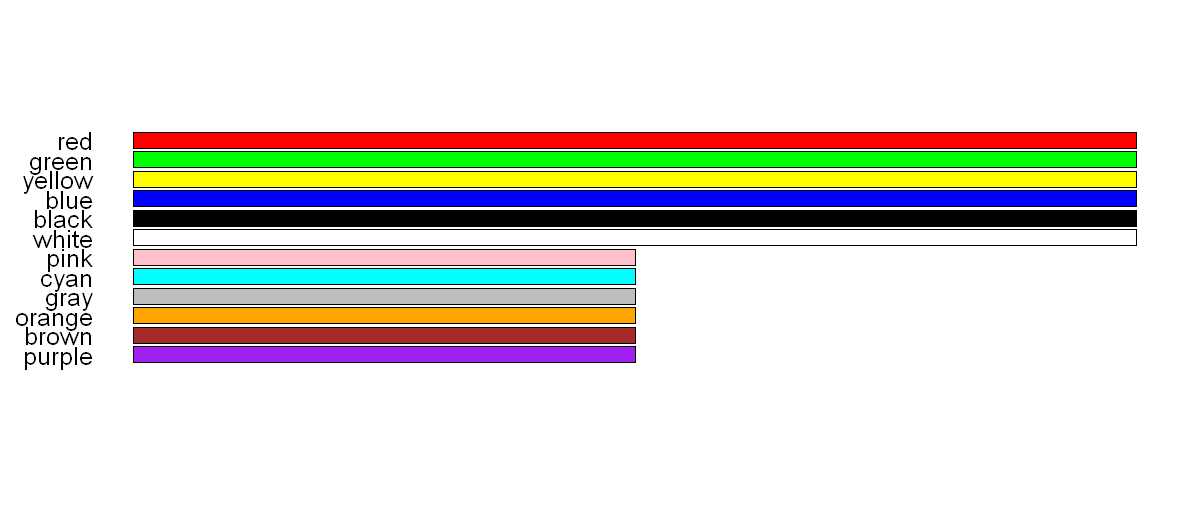

In [89]:
# Iliinsky and Steele color name vector
IScolors <- c("red", "green", "yellow", "blue",
              "black", "white", "pink", "cyan",
              "gray", "orange", "brown", "purple")

# Create the data for the barplot
barWidths <- c(rep(2, 6), rep(1, 6))

# Recreate the horizontal barplot with colored bars
barplot(
  rev(barWidths), 
  horiz = T,
  col = rev(IScolors), 
  axes = F,
  names.arg = rev(IScolors), 
  las = 1)

### Shape (pch)

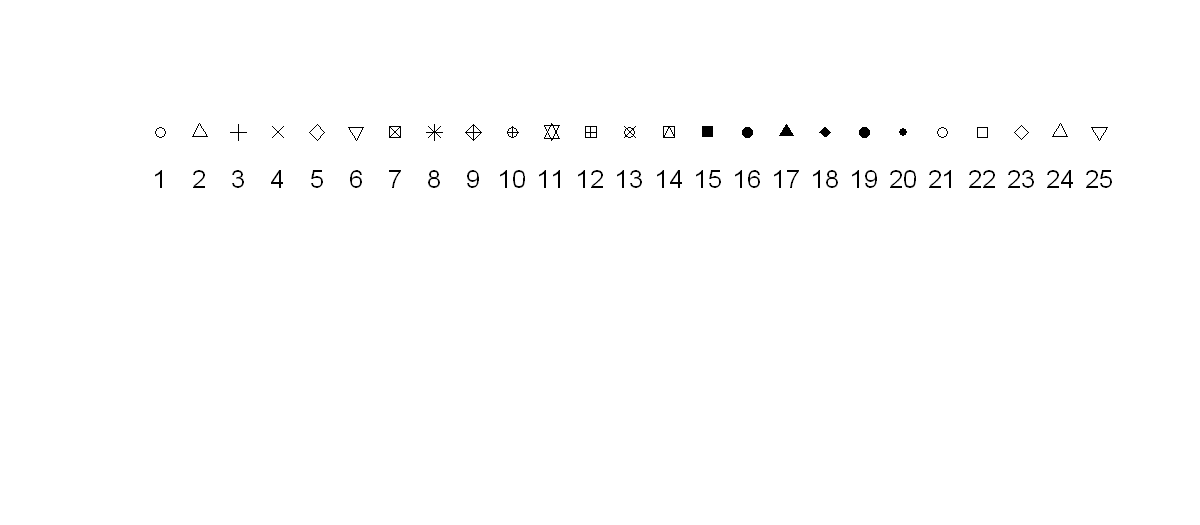

In [90]:
plot(1:25,rep(1,25), pch=1:25,
    text(x = 1:25, y = 0.8, labels = 1:25), axes=FALSE, ylim=c(0,1), xlab="",ylab="")

### Line Types (lty)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

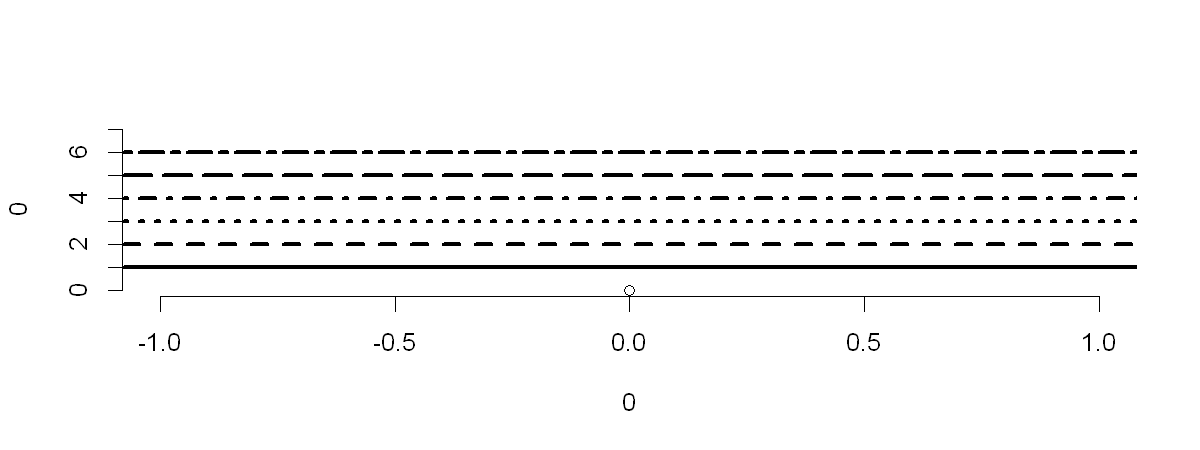

In [143]:
plot(0,0, ylim=c(0,7), frame=FALSE)
sapply(0:6,function(x) abline(h=x, lty=x, lwd=3))

## Base R
### Scatter Plot

#### Two Numeric Variables

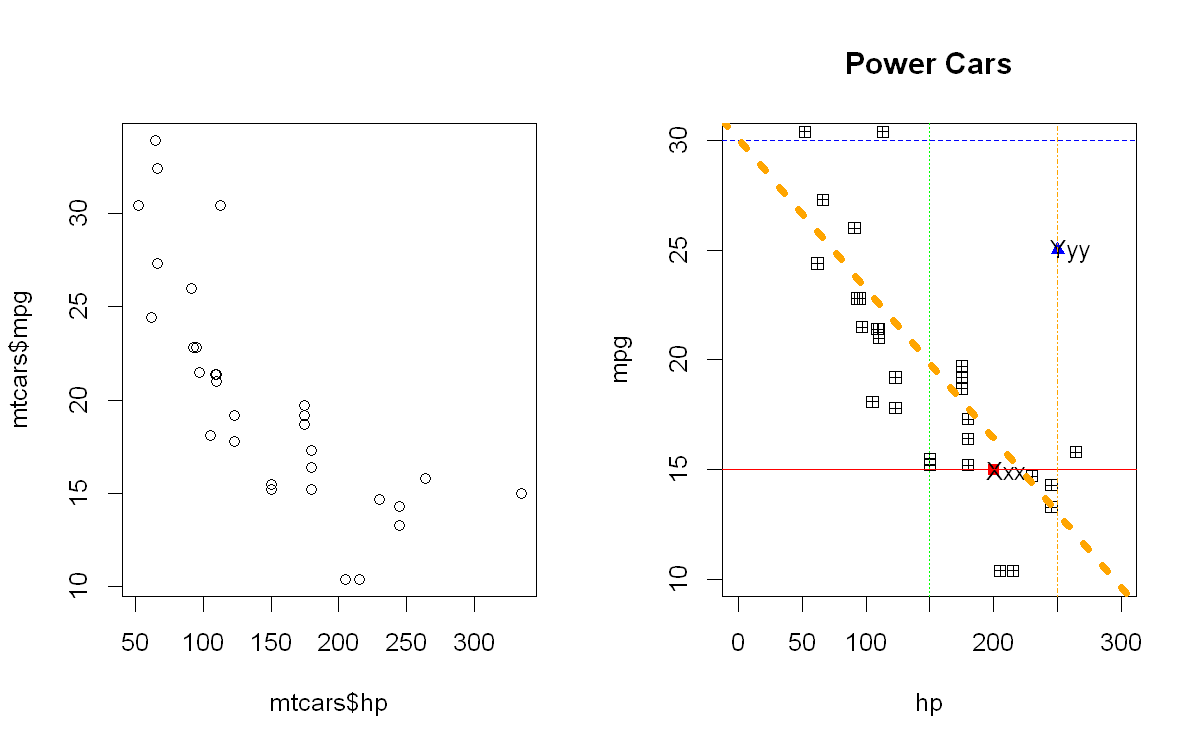

In [91]:
par(mfrow=c(1,2))
options(repr.plot.width =8 , repr.plot.height = 5, repr.plot.res = 150)

fit = lm(formula=mpg~hp, data=mtcars)
plot( mtcars$hp, mtcars$mpg) # default

plot( mtcars$hp, 
     mtcars$mpg,
     col='black', 
     pch=12,
    ylim=c(10,30),
    xlim=c(0,300),
    xlab='hp',
    ylab='mpg',
    main='Power Cars')

points(c(200,250),           # optional
       c(15,25), 
       col=c('red','blue'), 
       pch=c(15,17))       

text(x = c(200+10,250+10),       # optional
     y = c(15,25),  
     labels = c('Xxx','Yyy'))

abline(h = c(15,30),         # optional
       v = c(150,250), 
       col = c('red','blue','green','orange'), 
       lty = c(1,2,3,4,5))

abline(fit, col='orange',lty=3,lwd=5)  # superimpose linear model

#### Matrix Scatter Plot

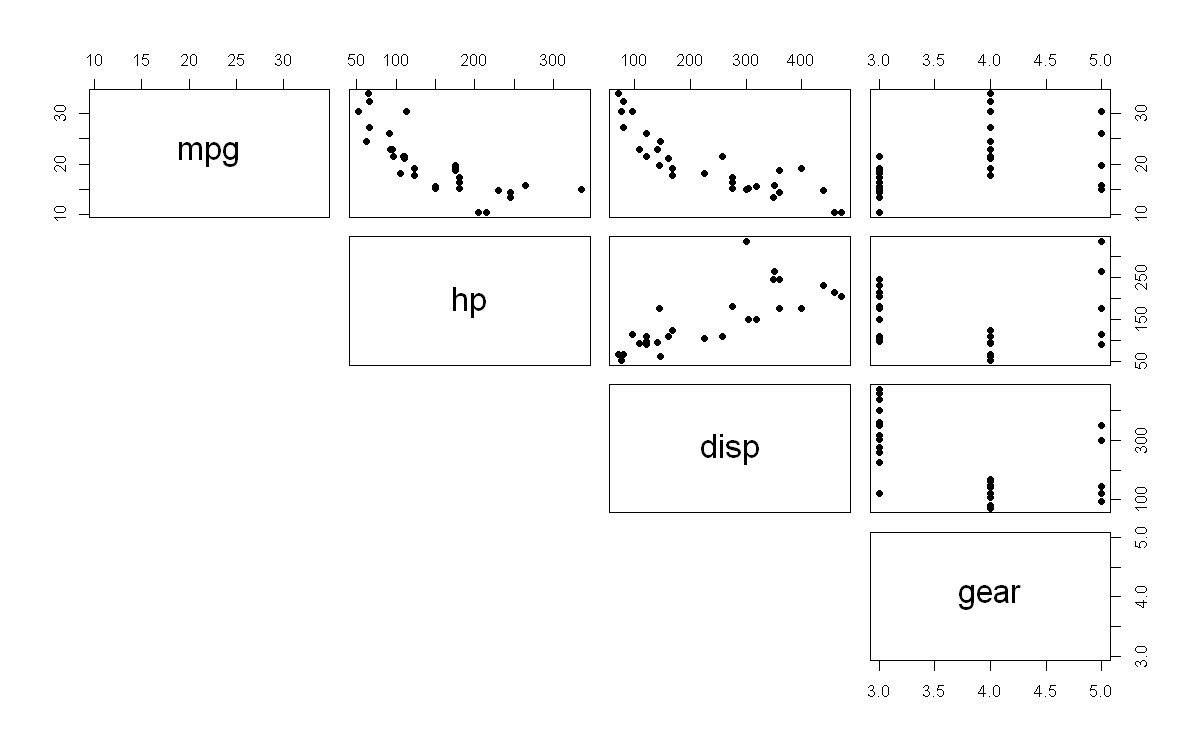

In [92]:
pairs( mtcars [,c('mpg','hp','disp','gear')], pch=19, lower.panel = NULL)

### Histogram
#### Single Numeric Variable
**hist() return data that can be used for further chart enhancemnt**

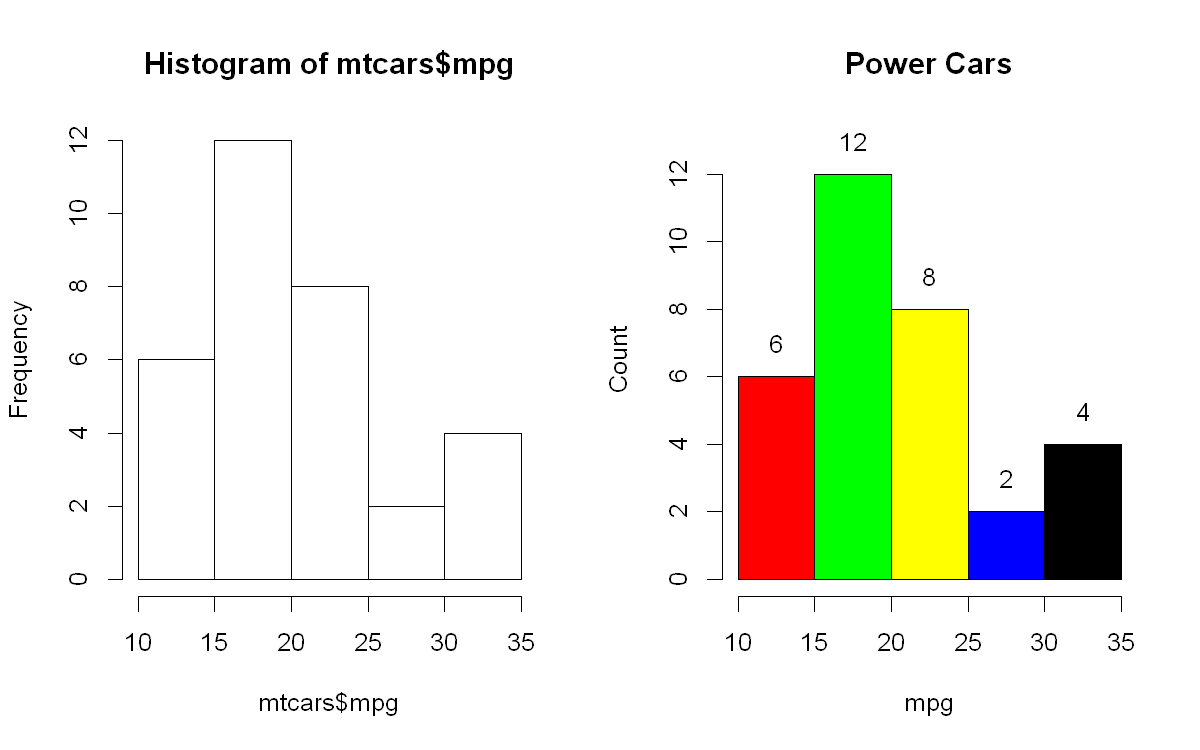

In [93]:
par(mfrow=c(1,2))

hist(mtcars$mpg)

chart = hist(mtcars$mpg, 
             col  = IScolors,      # optional
             main = 'Power Cars',  # optional
             ylim = c(0,13),       # optional
             xlab = 'mpg',         # optional
             ylab = 'Count')       # optional

text( x = chart$mids, 
      y = chart$counts+1, 
      labels = chart$counts)

#### Hist Return Data

In [94]:
chart

$breaks
[1] 10 15 20 25 30 35

$counts
[1]  6 12  8  2  4

$density
[1] 0.0375 0.0750 0.0500 0.0125 0.0250

$mids
[1] 12.5 17.5 22.5 27.5 32.5

$xname
[1] "mtcars$mpg"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

### Boxplot
#### Single Numeric Variable

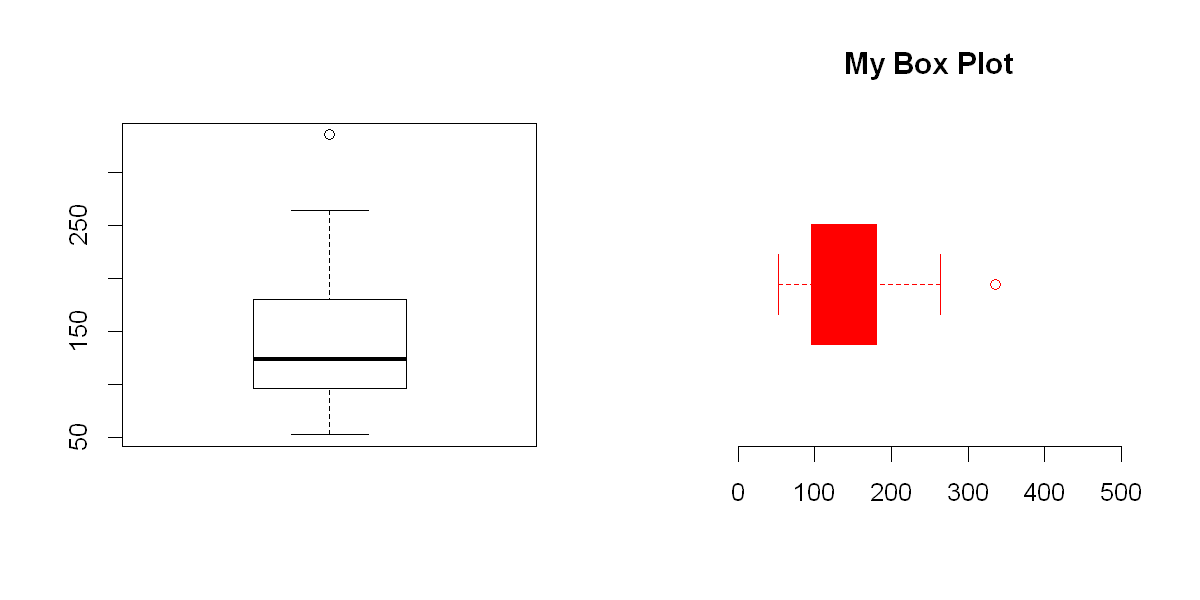

In [95]:
options(repr.plot.width =8 , repr.plot.height = 4, repr.plot.res = 150)
par(mfrow=c(1,2))
chart = boxplot (mtcars$hp)

boxplot (mtcars$hp,
         frame = FALSE,
         horizontal = TRUE,
         border=IScolors,
         col  = IScolors,       # optional
         ylim = c(0,500),       # optional
         main = 'My Box Plot')  # optional

#### Boxplot Return Data

In [96]:
chart

52
96
123
180
264
99.5382
146.4618


#### Grouped Boxplot
Using **formula and data** parameters

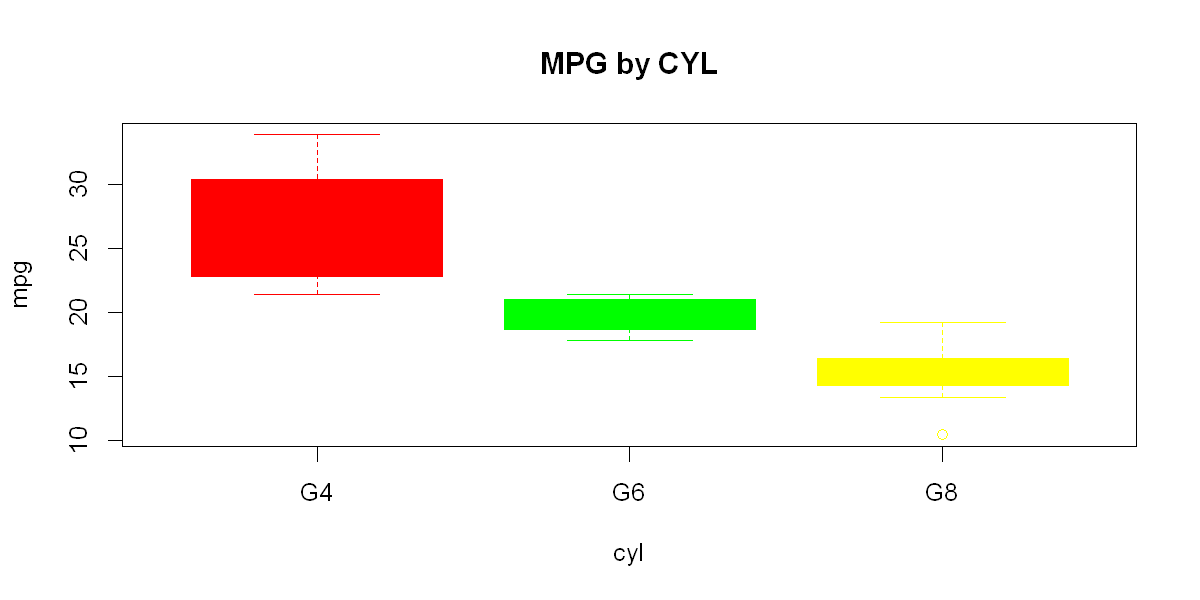

In [97]:
options(repr.plot.width =8 , repr.plot.height = 4, repr.plot.res = 150)
boxplot (formula=mpg~cyl, data=mtcars,
         frame = TRUE,
         border=IScolors,
         col  = IScolors,         # optional
         main = 'MPG by CYL',     # optional
         xlab = 'cyl',            # optional
         ylab = 'mpg',            # optional
         names=c('G4','G6','G8')) # optional

### Bar Plot
#### Single Numeric Variable
**barplot() return data that can be used for further chart enhancemnt**

In [98]:
## Create The Frequency Table
t = table( mtcars$cyl, dnn='cyl' )
print( t )

cyl
 4  6  8 
11  7 14 


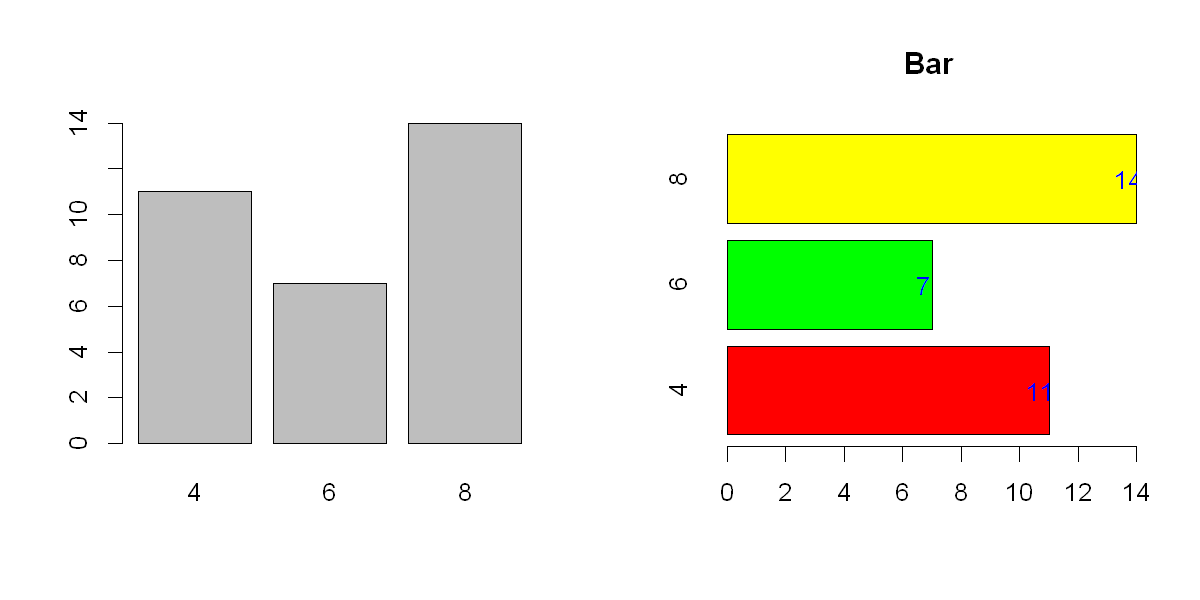

In [99]:
par(mfrow=c(1,2))
barplot(t)

mids = barplot(t, 
               horiz = T,                    # optional
               col  = IScolors,  # optional
               main = 'Bar')                   # optional

text ( t-0.3, mids, t, col='blue' ) # offset -0.3 on x position

#### Barplot Return Data

In [100]:
print( mids )

     [,1]
[1,]  0.7
[2,]  1.9
[3,]  3.1


#### Stacking Bar Plot

   gears
cyl  3  4  5
  4  1  8  2
  6  2  4  1
  8 12  0  2


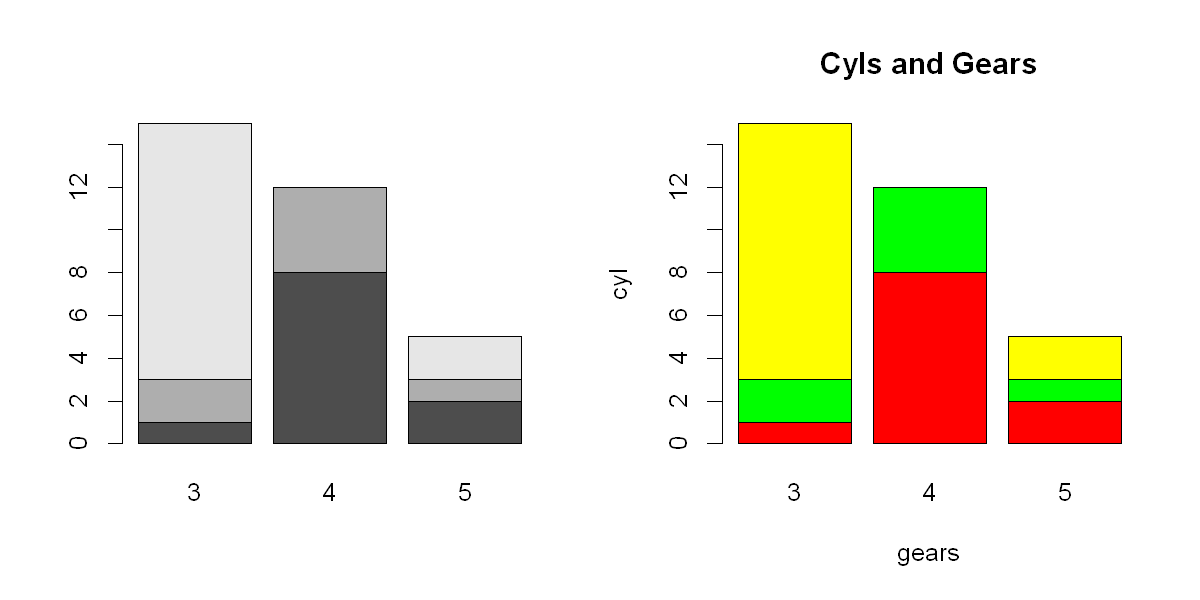

In [101]:
t2 = table( mtcars$cyl, mtcars$gear, dnn = c('cyl','gears'))
print( t2 )

par(mfrow=c(1,2))

barplot(t2)  # default

barplot(t2,  # decorated
        xlab ='gears',
        ylab ='cyl',
        col  = IScolors,
        main ='Cyls and Gears')

### Line Chart

**Line chart is a plot with type 'l'**.  
Line chart does not return any data.

In [102]:
x <- seq(0, 10, length = 200)
gauss1 <- dnorm(x, mean = 2, sd = 0.2)
gauss2 <- dnorm(x, mean = 4, sd = 0.5)

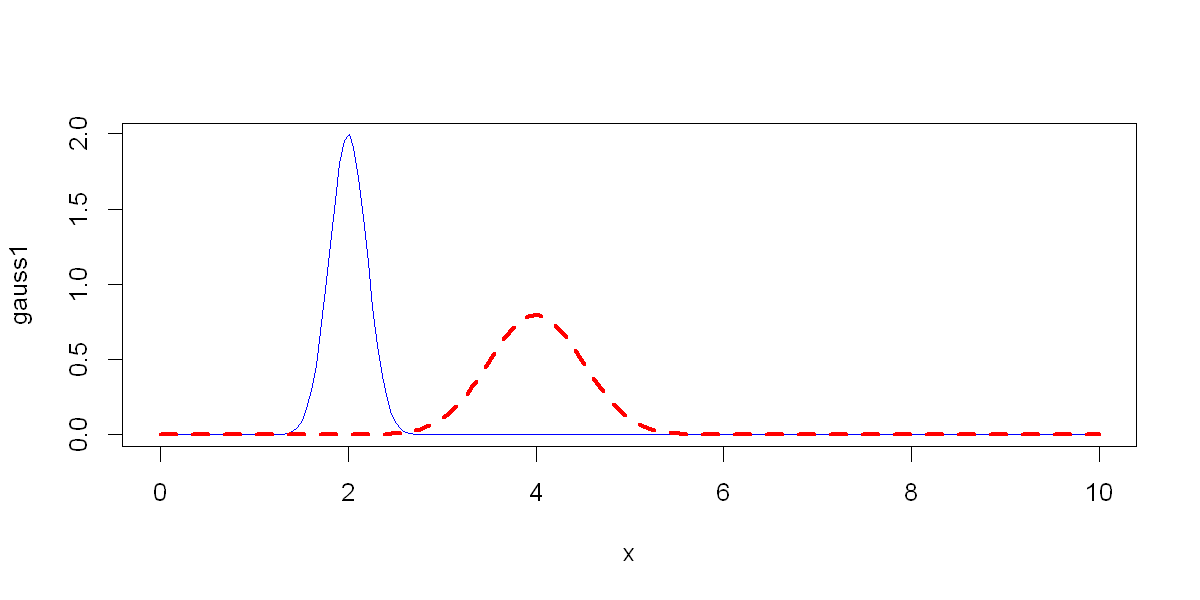

In [103]:
plot( x, gauss1, type= 'l', col='blue')
lines( x, gauss2, lty=2, lwd=3, col='red')

### Advance Customization
#### Create Empty Plot

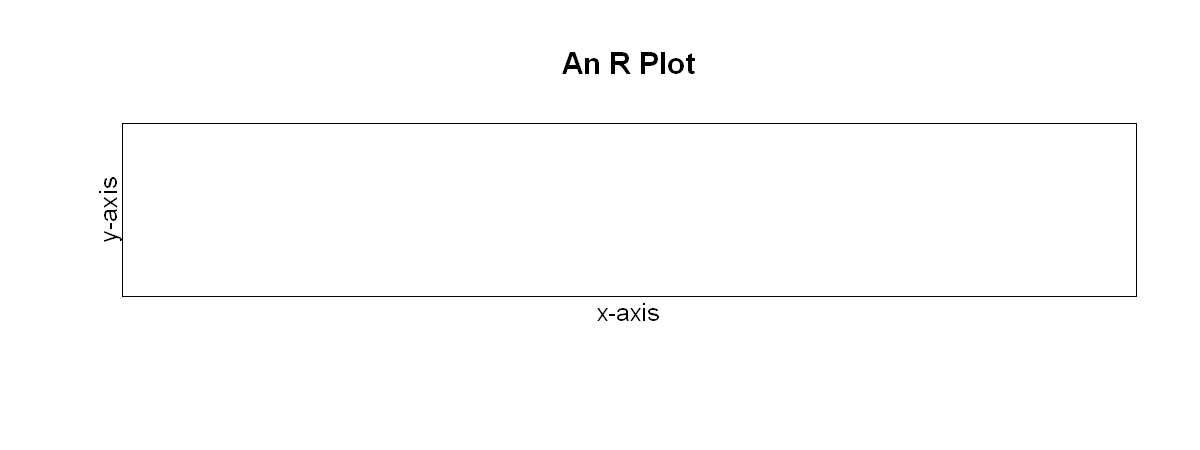

In [155]:
plot(5, 
     5, 
     type="n", 
     axes=FALSE, 
     ann=FALSE, 
     frame=TRUE,
     xlim=c(0, 10), 
     ylim = c(0,10))

# Add text to the x-axis
mtext("x-axis", side=1)

# Add text to the y-axis
mtext("y-axis", side=2) 

# Add a title
title("An R Plot")

#### Hiding

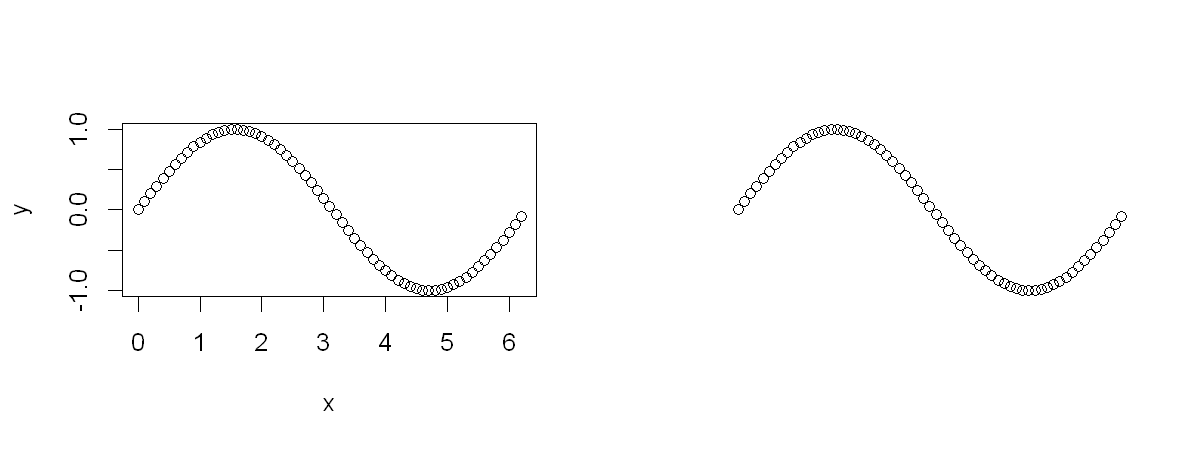

In [149]:
par(mfrow=c(1,2))
    
# The data
x <- seq(0,2*pi,0.1)
y <- sin(x)

plot(x, y)
    
# Hiding
plot(x,
     y,          
     frame=FALSE, # hide frame
     xaxt="n",    # hide x axes
     yaxt="n",    # hide y axes
     ann=FALSE)   # hide labels

#### Two Plots In One
The power of manual plotting is revealed in this section.

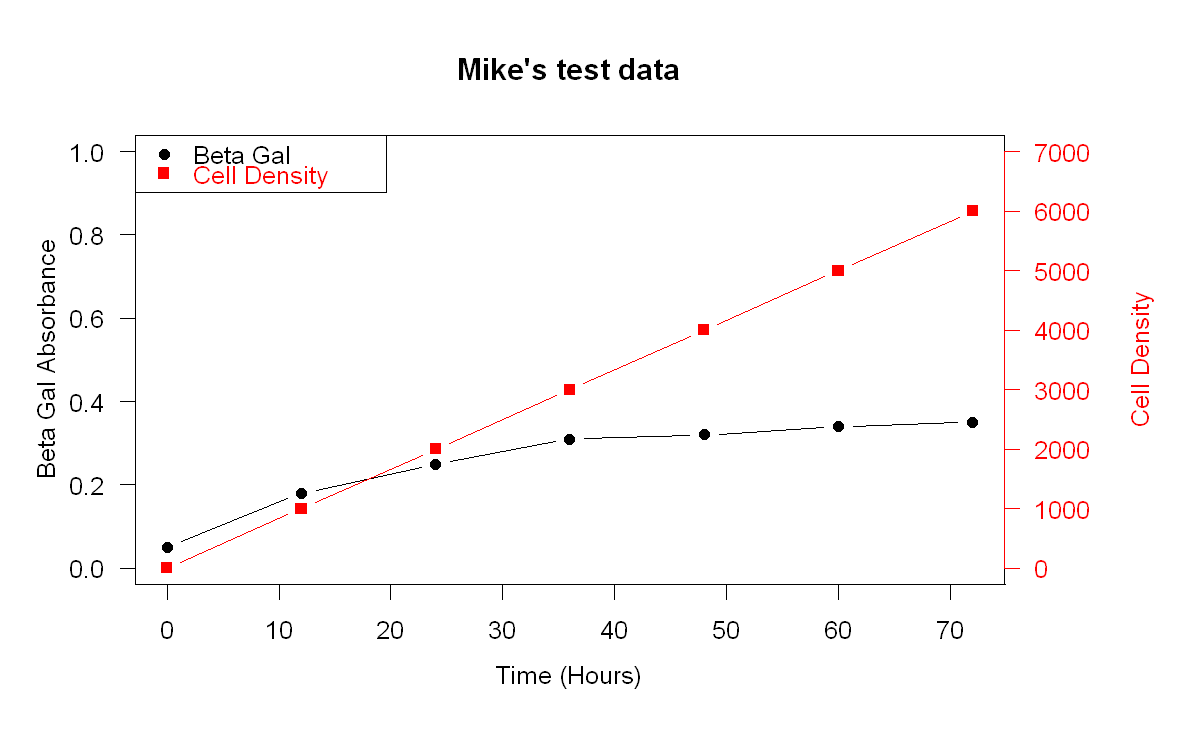

In [160]:
options(repr.plot.width =8 , repr.plot.height = 5, repr.plot.res = 150)

## set up some fake test data
time <- seq(0, 72, 12)
betagal.abs <- c(0.05, 0.18, 0.25, 0.31, 0.32, 0.34, 0.35)
cell.density <- c(0, 1000, 2000, 3000, 4000, 5000, 6000)

## add extra space to right margin of plot within frame
par(mar = c(5, 4, 4, 6) + 0.5)

## Plot first set of data and draw its axis
plot(time, betagal.abs, pch = 16, axes = FALSE, ylim = c(0, 1), xlab = "", ylab = "",
   type = "b", col = "black", main = "Mike's test data")
axis(2, ylim = c(0, 1), col = "black", las = 1) ## las=1 makes horizontal labels
mtext("Beta Gal Absorbance", side = 2, line = 2.5)
box()

## Allow a second plot on the same graph
par(new = TRUE)

## Plot the second plot and put axis scale on right
plot(time, cell.density, pch = 15, xlab = "", ylab = "", ylim = c(0, 7000),
    axes = FALSE, type = "b", col = "red")

## a little farther out (line=4) to make room for labels
axis(4, ylim = c(0, 7000), col = "red", col.axis = "red", las = 1)
mtext("Cell Density", side = 4, col = "red", line = 4)

## Draw the time axis
axis(1, pretty(range(time), 10))
mtext("Time (Hours)", side = 1, col = "black", line = 2.5)

## Add Legend
legend("topleft", 
        legend   = c("Beta Gal", "Cell Density"),
        text.col = c("black", "red"), 
        pch      = c(16, 15), 
        col     = c("black", "red"))

## ggplot

### Arranging Grid
- par(mfrow ...) does not work on ggplot
- use GridExtra::grid.arrange  instead

### Scatter Plot
```
- x     : x-axis
- y     : y-axis
- col   : piont border color
- fill  : point fill color
- size  : point size
- shape : point shape
- stroke: point border size
```

#### Two Numeric Variables

Basic Plot and **geom_point Cusotmization**

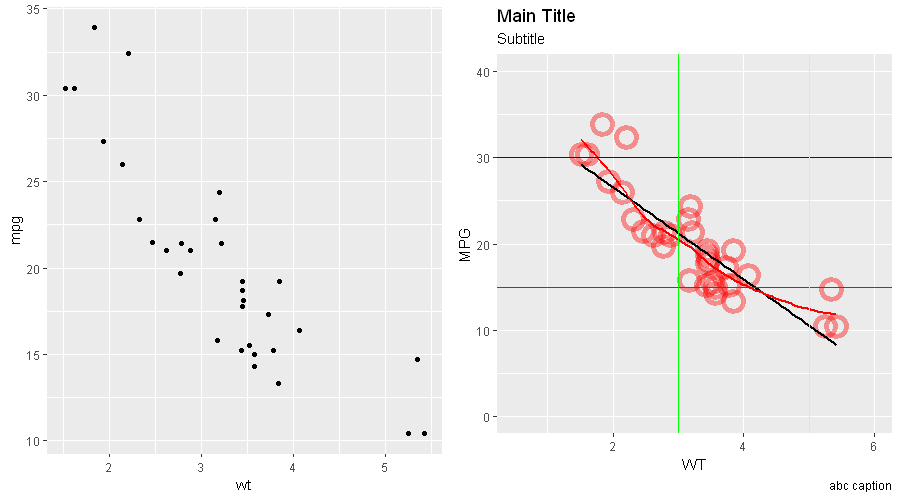

In [104]:
options(repr.plot.width = 9, repr.plot.height = 5, repr.plot.res = 100)
p1 = mtcars %>% ggplot(aes(x=wt, y=mpg)) + geom_point()
p2 = mtcars %>% ggplot(aes(x=wt, y=mpg)) + 

        geom_point(col='red', 
                   alpha = 0.4, 
                   size  = 5, 
                   shape = 21,
                   stroke = 3) +   # shape border size

        geom_smooth(method = lm, color='black', se=FALSE) +     # linear smoothing
        geom_smooth(method = loess, color='red', se=FALSE) +    # loess 

        geom_hline(yintercept = c(15,30), color= c('red','blue')) +
        geom_vline(xintercept = c(3,5), color= c('green','yellow')) +

        xlim(0.5,6) + ylim(0,40) +
        labs(title = 'Main Title', subtitle = 'Subtitle',caption = 'abc caption', x='WT', y='MPG') 

grid.arrange(p1,p2, ncol=2)

#### + Fill  and Col (Numeric or Factor)
**ggplot** fill and col parameter support **both discreet and continuous** variable.  
If the variable is not already factor, **convert it on the fly**.

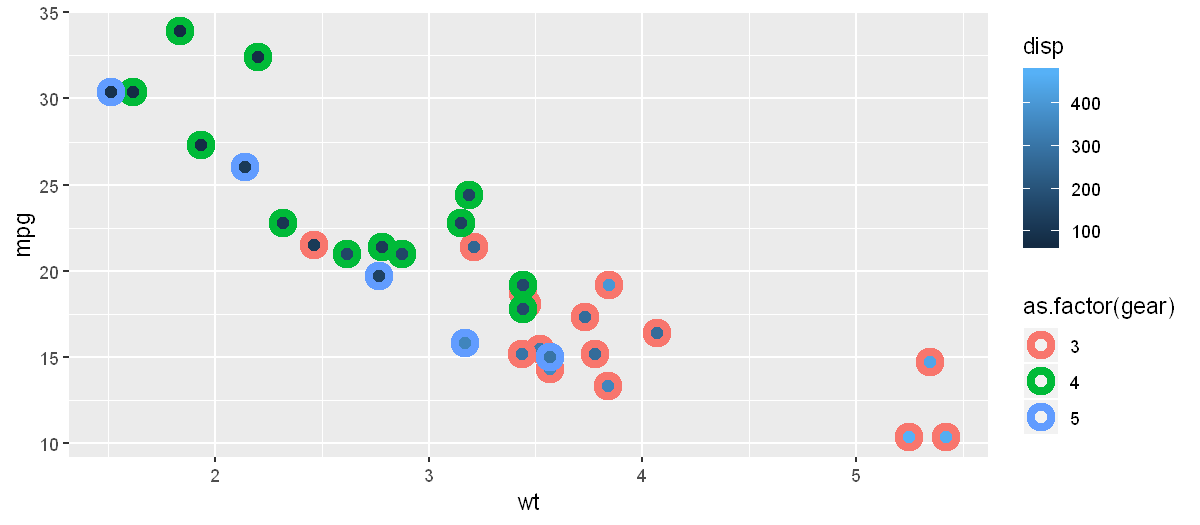

In [105]:
options(repr.plot.width =8 , repr.plot.height = 3.5, repr.plot.res = 150)
mtcars %>% ggplot(aes(x=wt, y=mpg, 
                      col=as.factor(gear), 
                      fill=disp )) + 
           geom_point(size=3, stroke=3, shape=21)   # shape 21 has border and empty fill

#### + Shape (factor)
**shape** require non-continous number. If the variable is not already factor, **convert it on the fly**.

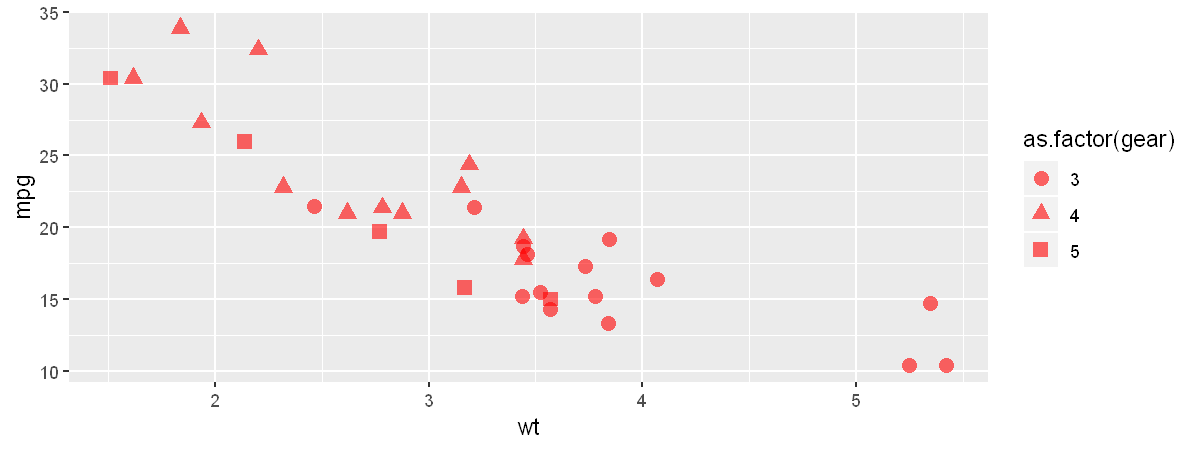

In [106]:
options(repr.plot.width =8 , repr.plot.height = 3, repr.plot.res = 150)
mtcars %>% ggplot(aes(x=wt, y=mpg, shape=as.factor(gear))) + geom_point(color='red', size=3, alpha=0.6)

#### + Size (Numeric) and Shape

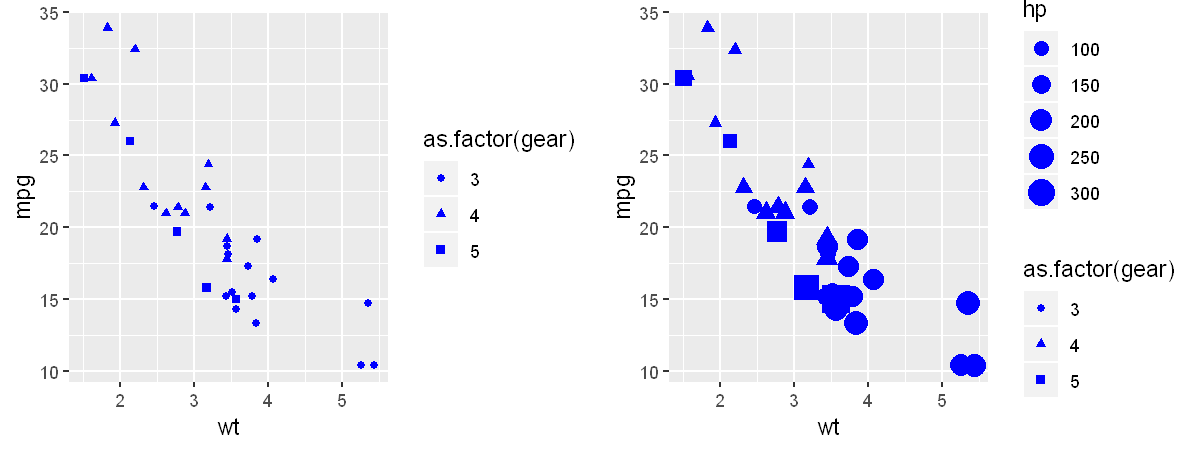

In [107]:
p1 = mtcars %>% ggplot(aes(x=wt, y=mpg,   # shape
                      shape=as.factor(gear))) +
                      geom_point(color='blue')

p2 = mtcars %>% ggplot(aes(x=wt, y=mpg,   # shape with size
                      shape=as.factor(gear), 
                      size=hp)) + geom_point(color='blue')
                           
grid.arrange(p1,p2, ncol=2)

#### Grouped Scatter Plot

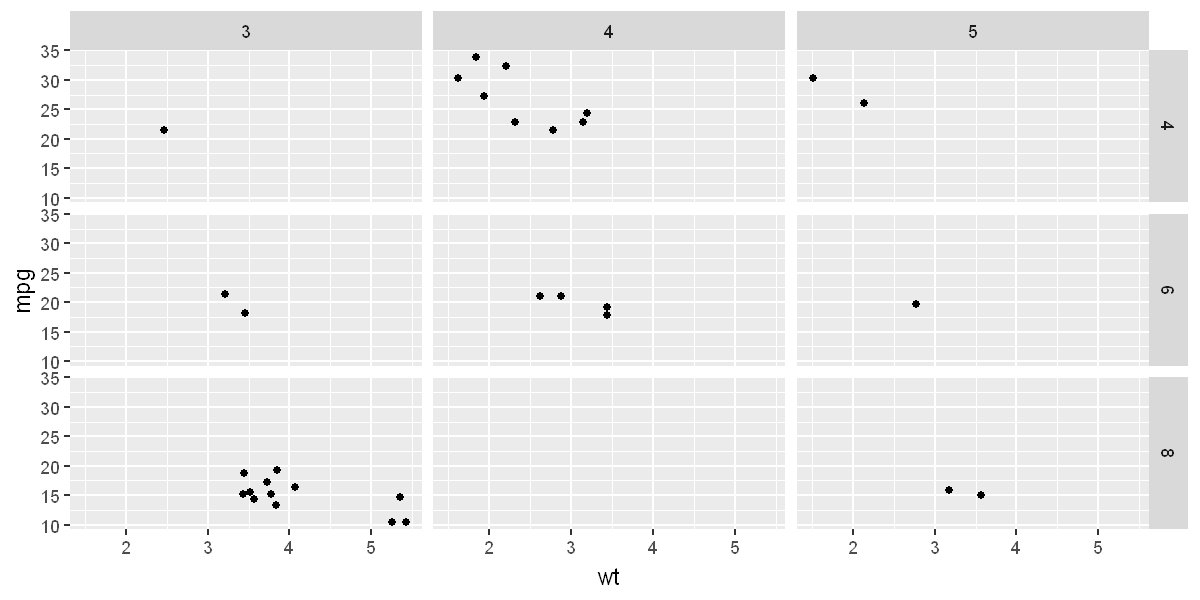

In [108]:
options(repr.plot.width =8 , repr.plot.height = 4, repr.plot.res = 150)
mtcars %>% ggplot(aes(x=wt, y=mpg)) + geom_point() + facet_grid(cyl~gear)

#### Matrix Scatter Plot
**Unfortunately** ggplot does not have a function for this

### Histogram
#### Single Numeric Varibale
Default geom_histogram produce 30 bins  
Customize it either with **bins=** or **binwidth**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


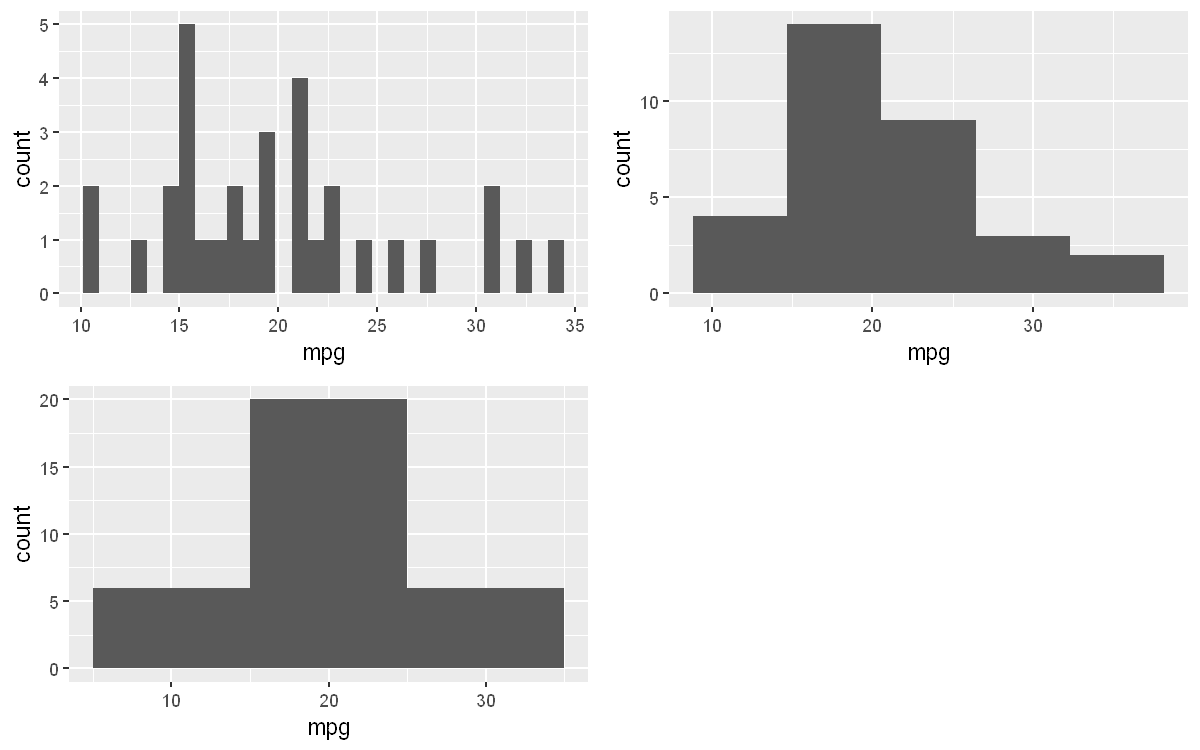

In [115]:
options(repr.plot.width =8 , repr.plot.height = 5, repr.plot.res = 150)
p1 = mtcars %>% ggplot(aes(x=mpg)) + geom_histogram()
p2 = mtcars %>% ggplot(aes(x=mpg)) + geom_histogram(bins=5)
p3 = mtcars %>% ggplot(aes(x=mpg)) + geom_histogram(binwidth=10)
grid.arrange(p1,p2,p3, ncol=2)

#### Grouped Histogram
**Stacking**

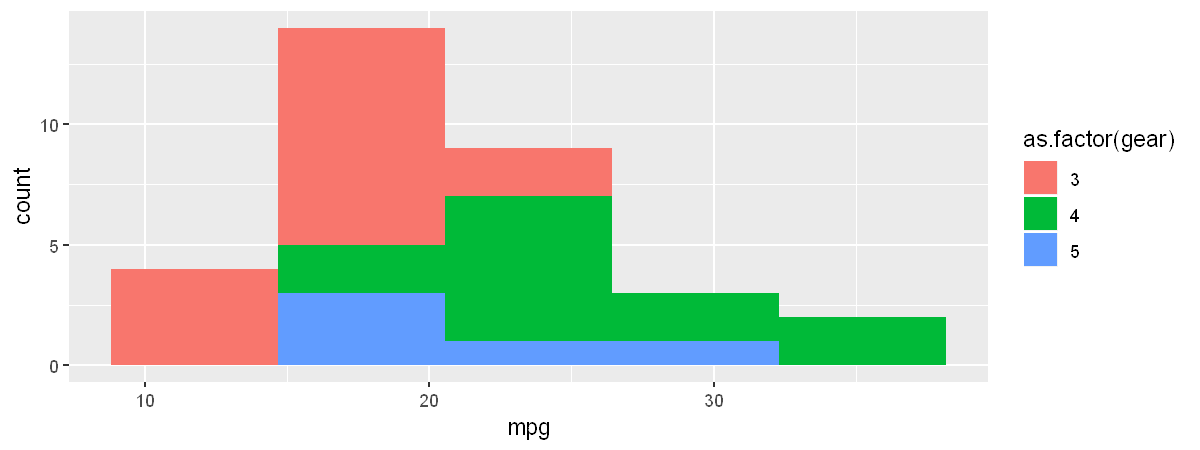

In [116]:
options(repr.plot.width =8 , repr.plot.height = 3, repr.plot.res = 150)
mtcars %>% 
ggplot(aes(x=mpg, fill=as.factor(gear))) + 
    geom_histogram(bins=5)

**Facet**

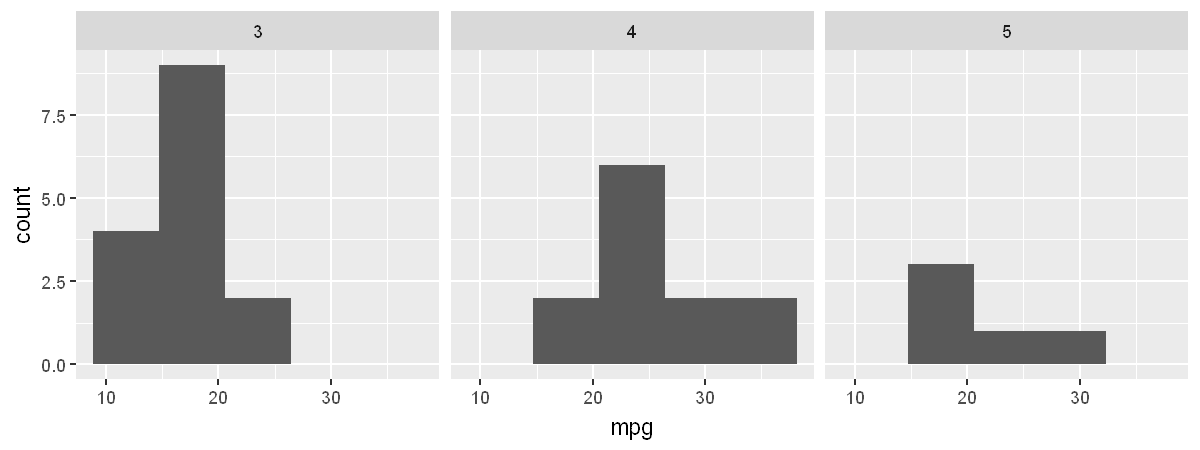

In [117]:
options(repr.plot.width =8 , repr.plot.height = 3, repr.plot.res = 150)
mtcars %>% 
    ggplot(aes(x=mpg)) + 
    geom_histogram(bins=5) +
    facet_grid(.~gear)

### Bar Plot
ggplot support bar plot with **geom_bar** and **geom_col**.
- **geom_bar** default with **frequency count on variable x**  
- **geom_col** default with **actual y value**  

x values need to be **discret**, use as.factor to convert if necessary.

#### Frequency Plot
**geom_bar** default to use frequency count

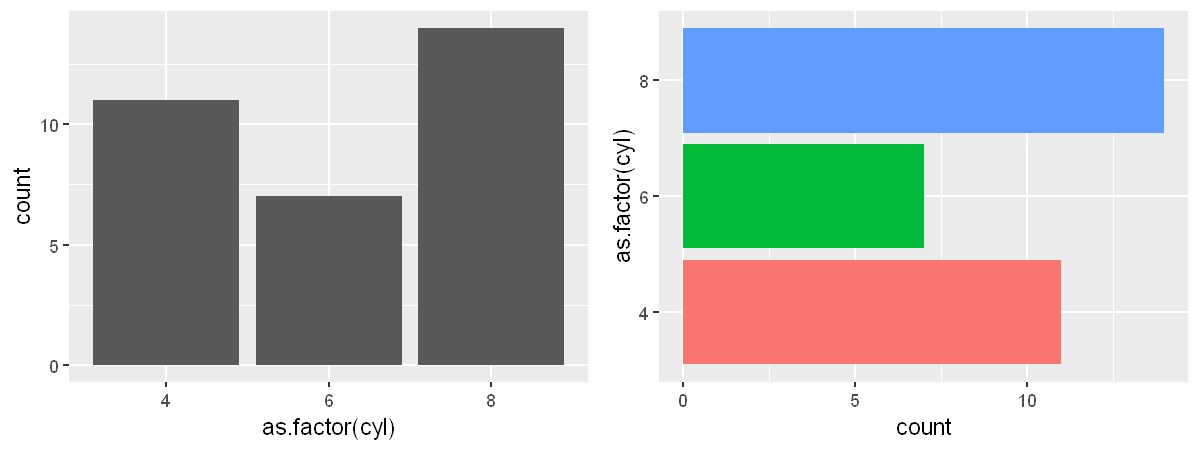

In [118]:
p1 = mtcars %>% 
    ggplot(aes(x=as.factor(cyl))) + geom_bar()
p2 = mtcars %>%  
    ggplot(aes(x=as.factor(cyl), 
        fill=as.factor(cyl))) + 
        geom_bar() + coord_flip() +
        theme(legend.position="none")  # hide legend
grid.arrange(p1,p2, ncol=2)

#### Stacking Frequency Plot
Use **fill** to seggregate the underlying groups(stacks)

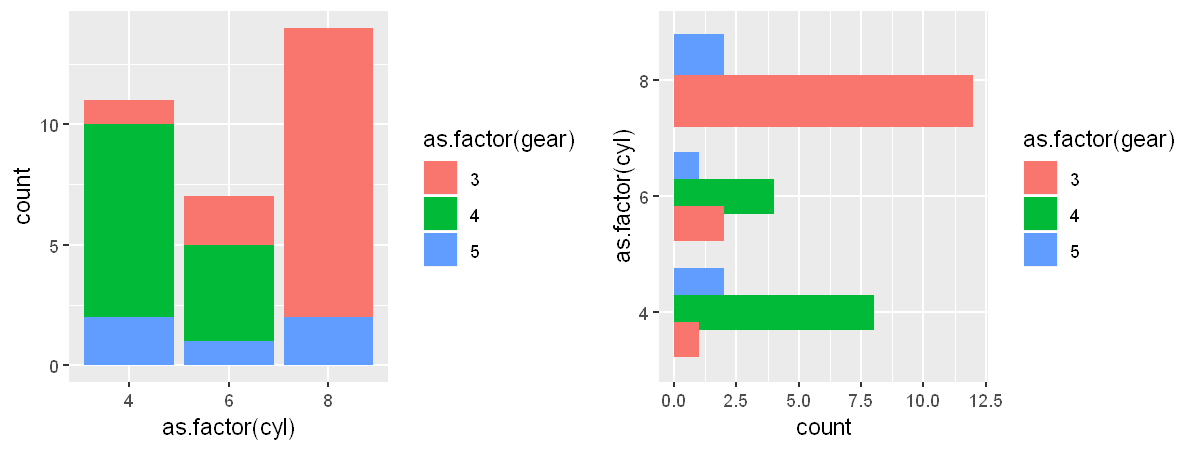

In [119]:
p1 = mtcars %>%  
    ggplot(aes(x=as.factor(cyl), 
    fill=as.factor(gear))) + 
    geom_bar()                               ## default position='stack'

p2 = mtcars %>%  
    ggplot(aes(x=as.factor(cyl), 
    fill=as.factor(gear))) + 
    geom_bar(position=position_dodge(0.7)) + ## dodge default 0.9 (side by side)
    coord_flip()

grid.arrange(p1,p2, ncol=2)

#### Value Plot
Use **geom_col** for actual value plot  
x should be **discret** (conver to factor if necessary)  
Use **reorder** to sort x-axis

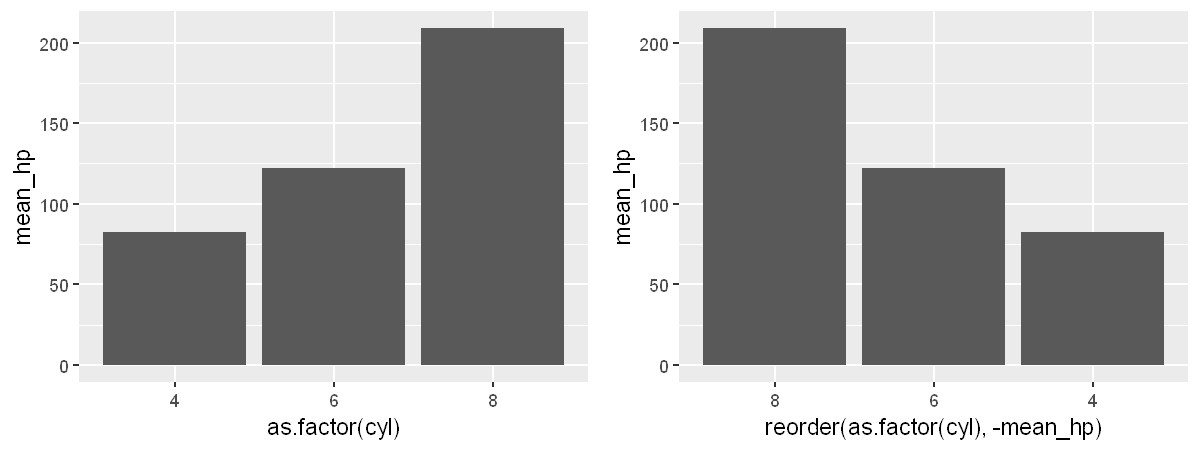

In [114]:
p1 = mtcars %>% 
    group_by(cyl) %>%
    summarize(mean_hp = mean(hp)) %>%  ## create the value
    ggplot(aes(x=as.factor(cyl),y=mean_hp)) +
      geom_col()

p2 = mtcars %>% 
    group_by(cyl) %>%
    summarize(mean_hp = mean(hp)) %>%  ## create the value
    ggplot(aes(x=reorder(as.factor(cyl), -mean_hp),y=mean_hp)) +
      geom_col()

grid.arrange(p1,p2, ncol=2)

### Other Customization

#### Double Y Axis with Different Scale
This is not supported